#White-grey attack TPOT and H2O on Pepo's prediction data

In [2]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.9 MB/s 
     |████████████████████████████████| 192.9 MB 72 kB/s 
     |████████████████████████████████| 139 kB 26.3 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=0902b4ba50eb40ed478103305bc65007c7f7569b8df858136aefe810368a6882
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [3]:
import tpot

In [4]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)



In [5]:
predictions = pd.read_csv('https://gitlab.com/CEADS/nuclear_ai_cyber/-/raw/main/reverse_engineer/GreyBox/extra_trees_attacks/GPWR_TPOT_MODEL_PREDICTIONS_DATA.csv')
data = pd.read_csv('https://gitlab.com/CEADS/nuclear_ai_cyber/-/raw/main/reverse_engineer/GreyBox/extra_trees_attacks/GPWR_TPOT_MODEL_Testing_DATA.csv')

In [6]:
data

2    3        4        5        6        7        8        9  \
0      2.4  4.5  250.364  269.370  185.244  269.202  164.031  148.672   
1      2.4  4.5  566.665  563.324  562.692  566.531  563.499  563.499   
2      2.4  4.5  564.585  558.470  558.030  564.052  559.170  559.170   
3      2.4  4.5  387.421  382.480  382.480  387.898  388.124  388.124   
4      2.4  4.5  594.111  563.402  563.402  594.167  563.401  563.401   
...    ...  ...      ...      ...      ...      ...      ...      ...   
55528  2.4  4.5  575.035  564.653  564.653  575.083  564.689  564.690   
55529  2.4  4.5  569.817  562.353  562.353  569.827  562.356  562.356   
55530  2.4  4.5  573.809  573.312  573.312  573.741  573.185  573.185   
55531  0.0  2.4    4.500  593.408  562.752  562.752  593.474  562.750   
55532  2.4  4.5  590.525  562.422  562.422  590.067  562.421  562.415   

             14       15  ...         25         26        27       28  \
0      245.6070  113.414  ...    0.00000   346.8250   350.100  225.806   
1      593.3270  107.745  ...   38.59340  1127.0400  1127.180  564.926   
2      604.9750  107.748  ...   19.34150  1097.6000  1097.720  561.514   
3      408.9900  121.514  ...    0.00000    42.4778   180.981  386.481   
4      643.0710  107.775  ...  585.67100  1120.0200  1120.020  578.770   
...         ...      ...  ...        ...        ...       ...      ...   
55528  618.8370  108.109  ...  127.38100  1131.8300  1131.840  569.865   
55529  639.7560  107.800  ...    6.56246  1123.5700  1123.570  566.088   
55530  608.5960  108.148  ...   25.38500  1234.7600  1232.630  573.512   
55531   99.7485  643.474  ...  582.56200  1114.5900  1114.590  578.096   
55532  616.5120  107.926  ...    6.02617  1141.9400  1141.950  576.358   

            29       31       32          33  EOL  MOL  
0      1700.00  237.065  237.065    0.000000    0    1  
1      2063.69  641.299  641.299    0.000000    1    0  
2      2007.84  637.416  637.416    0.002104    0    0  
3      1700.00  452.354  452.354    0.000000    1    0  
4      2244.22  653.297  653.297  657.310000    1    0  
...        ...      ...      ...         ...  ...  ...  
55528  2209.82  651.071  651.071    0.002709    0    0  
55529  2179.59  649.093  649.093    0.000015    0    0  
55530  2248.24  653.554  653.554    0.000000    0    1  
55531  2247.52  653.509  653.509  655.942000    1    0  
55532  2253.41  653.885  653.885    0.000000    1    0  

[55533 rows x 27 columns]

In [7]:
predictions= predictions.values.ravel() 
predictions

array([ 2,  9,  9, ...,  3,  0, 10])

In [8]:
data.columns

Index(['2', '3', '4', '5', '6', '7', '8', '9', '14', '15', '16', '17', '19',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '31', '32', '33',
       'EOL', 'MOL'],
      dtype='object')

In [9]:
#Splitting the Dataset into Training and Testing Set 50 50 Split Random State=0
X_train, X_test, Y_train, Y_test = train_test_split(data, predictions, train_size=0.5, test_size=0.5, random_state=0)
#Dropping the time from the X datasets creating a time dataframe 

#print(Y_train)
print( X_train.shape)
print( X_test.shape)
print( Y_train.shape)
print( Y_test.shape)


(27766, 27)
(27767, 27)
(27766,)
(27767,)


In [10]:
from tpot import TPOTClassifier

##TPOT Pepo's simple run 

In [12]:
#Entering the TPOTClassifier Parameters
#CV=10, random_state=0
#populations and generations were changed to 3 to allow faster execution time. To get comparable accuracy to the ones 
#in Gitlab, change them both to 10. 
tpot = TPOTClassifier(generations=3, population_size=3, cv=10, verbosity=2,  random_state=0, n_jobs=-1)

In [ ]:
import time
#Starting Timer 
t0 = time.time()
#Creating the Classification Model
optimized = tpot.fit(X_train, Y_train)
#Stopping Timer
t1 = time.time()
#Printing Execution Time for fit
total = t1-t0
time_taken =  " The total time taken to run is: " + str(total) + " seconds" 

Optimization Progress:   0%|          | 0/12 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.907405403484157

Generation 2 - Current best internal CV score: 0.907405403484157

Generation 3 - Current best internal CV score: 0.907405403484157

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=2, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.4, verbosity=0)


In [ ]:
# Export the pipeline as a python script file
tpot.export('gpwr-attack.py')

In [ ]:
print(time_taken)

###Missclassification Analysis

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFwe, VarianceThreshold, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from copy import copy
from sklearn.ensemble import RandomForestClassifier

In [14]:
#This is the victim pipeline. It will 
# Average CV score on the training set was: 0.9281148413614158
exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        FunctionTransformer(copy)
    ),
    ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.8, min_samples_leaf=12, min_samples_split=20, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 0)


exported_pipeline.fit(X_train, Y_train)
results1 = exported_pipeline.predict(X_test)



In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFwe, VarianceThreshold, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

# # NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=0)

# Average CV score on the training set was: 0.9845854793232596
exported_pipeline = make_pipeline(
    VarianceThreshold(threshold=0.001),
    SelectFwe(score_func=f_classif, alpha=0.019),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9500000000000001, min_samples_leaf=3, min_samples_split=5, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 0)

exported_pipeline.fit(X_train, Y_train)
results1 = exported_pipeline.predict(X_test)


In [ ]:
#Transient key-value pairs. The predictions data consists only of numbers. This dictionary shows which number corresponds to which transient. 
# Analysis_Dataset[35] = Analysis_Dataset[35].map({'Transient-Feedwater Pump Trip' : 1,
# 'Transient-LOCA LOOP' : 2, 'Transient Valve Closure ' : 3,
# 'Transient Rapid Power Change ' : 4, 'TRANSIENT-Normal Ops ' : 0, 'Transient- Max Steam Line Rupture ' : 6,
# 'Transient-Manual Trip ' : 7, 'Transient Load Rejection ' : 8, 'Transient Single Coolant Pump Trip ': 9, 
# 'Transient Total Coolant Pump Trip ': 10, 'Transient Turbine Trip No SCRAM ': 11, 'Transient- Depressurization ': 5 })

In [20]:
labels = [1,2,3,4,0,6,7,8,9,10,11,5]

In [21]:
exported_pipeline.score(X_test,Y_test)

0.9852342708971081

(12, 12)


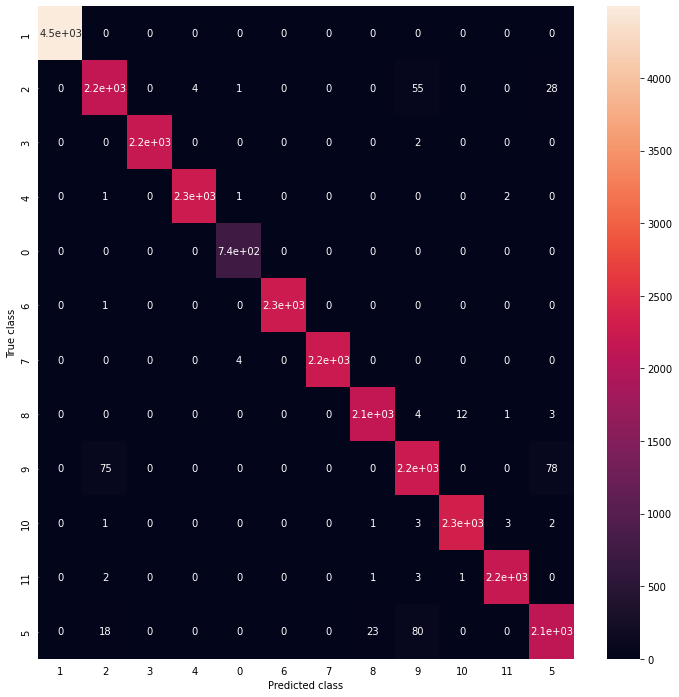

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# y_valid = valid['Steady']
# valid_drop = valid.drop(['Steady'],axis=1)
cm = confusion_matrix(Y_test, results1)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df.shape)
plt.figure(figsize=(12,12))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='black')
plt.xlabel('Predicted class', color='black')
plt.tick_params(color='white',labelcolor='black')
plt.show()

##H2O Pepo's simple run

In [27]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.1 MB 46 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=e5c54c8f601e0d2d87d556ada3072a36ede736e6708021ac896b19eaa2cfddac
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o


In [28]:
import h2o

In [29]:
import numpy as np
import pandas as pd
import sklearn
#import tpot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import csv
import platform
#from tpot import TPOTClassifier
import time

#import h2o

In [30]:
data = pd.read_csv('https://gitlab.com/CEADS/nuclear_ai_cyber/-/raw/main/reverse_engineer/GreyBox/extra_trees_attacks/GPWR_TPOT_MODEL_Testing_DATA.csv')
predictions = pd.read_csv('https://gitlab.com/CEADS/nuclear_ai_cyber/-/raw/main/reverse_engineer/GreyBox/extra_trees_attacks/GPWR_TPOT_MODEL_PREDICTIONS_DATA.csv')


In [31]:
data['Predictions'] = predictions

In [32]:
data

2    3        4        5        6        7        8        9  \
0      2.4  4.5  250.364  269.370  185.244  269.202  164.031  148.672   
1      2.4  4.5  566.665  563.324  562.692  566.531  563.499  563.499   
2      2.4  4.5  564.585  558.470  558.030  564.052  559.170  559.170   
3      2.4  4.5  387.421  382.480  382.480  387.898  388.124  388.124   
4      2.4  4.5  594.111  563.402  563.402  594.167  563.401  563.401   
...    ...  ...      ...      ...      ...      ...      ...      ...   
55528  2.4  4.5  575.035  564.653  564.653  575.083  564.689  564.690   
55529  2.4  4.5  569.817  562.353  562.353  569.827  562.356  562.356   
55530  2.4  4.5  573.809  573.312  573.312  573.741  573.185  573.185   
55531  0.0  2.4    4.500  593.408  562.752  562.752  593.474  562.750   
55532  2.4  4.5  590.525  562.422  562.422  590.067  562.421  562.415   

             14       15  ...         26        27       28       29       31  \
0      245.6070  113.414  ...   346.8250   350.100  225.806  1700.00  237.065   
1      593.3270  107.745  ...  1127.0400  1127.180  564.926  2063.69  641.299   
2      604.9750  107.748  ...  1097.6000  1097.720  561.514  2007.84  637.416   
3      408.9900  121.514  ...    42.4778   180.981  386.481  1700.00  452.354   
4      643.0710  107.775  ...  1120.0200  1120.020  578.770  2244.22  653.297   
...         ...      ...  ...        ...       ...      ...      ...      ...   
55528  618.8370  108.109  ...  1131.8300  1131.840  569.865  2209.82  651.071   
55529  639.7560  107.800  ...  1123.5700  1123.570  566.088  2179.59  649.093   
55530  608.5960  108.148  ...  1234.7600  1232.630  573.512  2248.24  653.554   
55531   99.7485  643.474  ...  1114.5900  1114.590  578.096  2247.52  653.509   
55532  616.5120  107.926  ...  1141.9400  1141.950  576.358  2253.41  653.885   

            32          33  EOL  MOL  Predictions  
0      237.065    0.000000    0    1            2  
1      641.299    0.000000    1    0            9  
2      637.416    0.002104    0    0            9  
3      452.354    0.000000    1    0            6  
4      653.297  657.310000    1    0            3  
...        ...         ...  ...  ...          ...  
55528  651.071    0.002709    0    0            8  
55529  649.093    0.000015    0    0           11  
55530  653.554    0.000000    0    1            3  
55531  653.509  655.942000    1    0            0  
55532  653.885    0.000000    1    0           10  

[55533 rows x 28 columns]

In [33]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxxmivpva
  JVM stdout: /tmp/tmpxxmivpva/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxxmivpva/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.4
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_n3i6ku
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

In [34]:
# convert pandas DataFrame into H2O Frame
Data = h2o.H2OFrame(data)
# Describe  the train h20Frame
Data.describe()
#test_df = h2o.H2OFrame(Test)
# Describe  the train h20Frame
#test_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:55533
Cols:28




2 3 4 5 6 7 8 9 14 15 16 17 19 21 22 23 24 25 26 27 28 29 31 32 33 EOL MOL Predictions 
 
 
 type real real real real real real real real real real real real real real real real real real real real real real real real real int int int 
 mins 0.0 2.4 4.5 140.984 109.64 203.146 111.095 99.2419 99.4619 107.732 0.0 86.2528 0.0 0.0 0.0 0.0 0.0 0.0 26.9348 40.8375 176.622 1700.0 153.917 153.917 -19.3392 0.0 0.0 0.0 
 mean 2.008881205769541 4.157771055048346 446.89689204616917 531.9971537464256 527.3430282534725 538.3672332306918 531.6336521167582 528.1208518574557 495.34791570057416 217.55689438712082 19.889590272779657 124.35256501539615 46.458609176854814 227.4887521328058 152.5625130560171 117.40663512428542 121.85827487232196 121.61015666382833 986.4849135739128 998.7970195901528 534.728382151155 2087.2736297336673 601.0033313345234 601.0033313345234 106.62914351940687 0.27360308285163776 0.3907586480110925 5.139448616138149 
 maxs 2.4 4.5 623.947 617.622 577.809 624.07 617.659 577.434 651.335 648.149 108.297 246.001 100.0 2583.99 2000.0 1244.73 1644.05 1644.48 1273.78 1273.64 598.453 2318.73 658.0210000000001 658.0210000000001 1549.1 1.0 1.0 11.0 
 sigma 0.8864114979812765 0.7756100607336195 212.282871356455 85.30782355551482 88.82432612856566 82.17424957229652 89.08368681003479 88.74597693828737 203.20883334300575 199.12412085675874 39.27605614310782 33.09104772783935 23.808949744215855 602.6918158410788 327.03548622305357 292.8178258473681 295.2939552648342 295.42461978062994 316.1745559891947 289.29438952292134 85.15948399186473 219.86268827532777 108.89690511669833 108.89690511669833 334.0858384376108 0.4458116360336783 0.4879248036605792 3.7097866900710654 
 zeros 9050 0 0 0 0 0 0 0 0 0 33215 0 4764 21280 7042 10900 2705 10299 0 0 0 0 0 0 37905 40339 33833 9050 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 2.4 4.5 250.364 269.37 185.24400000000003 269.202 164.03099999999998 148.672 245.607 113.414 3.052 113.946 89.8428 0.0 0.0 0.0 11.4828 0.0 346.825 350.1 225.806 1700.0 237.065 237.065 0.0 0.0 1.0 2.0 
 1 2.4 4.5 566.665 563.3240000000001 562.692 566.531 563.499 563.499 593.327 107.745 0.0 109.937 39.1174 0.0 11.1728 15.178 44.5314 38.5934 1127.04 1127.18 564.9259999999999 2063.69 641.299 641.299 0.0 1.0 0.0 9.0 
 2 2.4 4.5 564.585 558.47 558.03 564.052 559.17 559.17 604.975 107.748 0.0 109.963 21.518 0.0 0.0 0.0 25.0146 19.3415 1097.6 1097.72 561.514 2007.84 637.4159999999999 637.4159999999999 0.00210367 0.0 0.0 9.0 
 3 2.4 4.5 387.421 382.48 382.48 387.898 388.124 388.124 408.99 121.514 10.2517 191.891 32.6497 0.00152802 135.722 0.0 3.89007 0.0 42.4778 180.981 386.481 1700.0 452.354 452.354 0.0 1.0 0.0 6.0 
 4 2.4 4.5 594.111 563.4019999999999 563.4019999999999 594.1669999999999 563.401 563.401 643.071 107.775 0.0 110.008 53.8624 965.417 584.655 584.6569999999999 585.674 585.6709999999999 1120.02 1120.02 578.77 2244.22 653.297 653.297 657.31 1.0 0.0 3.0 
 5 2.4 4.5 568.071 565.013 565.013 568.076 565.014 565.014 622.325 108.114 0.0 110.291 58.0404 106.861 27.9632 27.9671 29.0452 27.2808 1145.35 1145.35 566.544 2218.65 651.645 651.645 0.0 0.0 0.0 8.0 
 6 2.4 4.5 596.245 552.606 552.606 594.03 552.538 552.555 637.774 107.745 0.0 109.941 35.1489 860.2819999999999 299.55 299.431 281.994 282.11 1001.53 1001.43 573.857 2009.52 637.543 637.543 -17.1898 0.0 0.0 10.0 
 7 2.4 4.5 294.696 305.024 290.851 299.025 247.164 254.018 293.647 112.02 3.80978 122.671 95.1221 0.0 0.0 0.0 7.33743 0.0 235.753 356.265 285.562 1700.0 287.341 287.341 0.0 0.0 0.0 2.0 
 8 0.0 2.4 4.5 591.525 561.106 561.106 591.786 561.101 100.023 640.341 107.843 110.158 53.9975 1184.69 574.939 574.939 580.127 579.9580000000001 1099.62 1099.65 576.38 2240.91 653.0840000000001 653.0840000000001 650.8919999999999 0.0 1.0 0.0 
 9 2.4 4.5 574.308 573.703 573.703 574.252 573.562 573.562 612.935 107.927 0.0 110.164 57.8916 0.0 14.7906 13.3713 0.0 33.2789 1234.55 1232.2 573.956 2240.8 653.076 653.076 0.0 1.0 0.0 3.0

In [35]:
predictors = Data.col_names[:-1]
response = 'Predictions'

In [36]:
train, valid = Data.split_frame(ratios = [.5])

In [37]:
x = train.columns
x.remove(response)

In [38]:
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
print(train[response].isfactor())

[True]


In [39]:
#H2o Parameters 
#As can be seen below, accuracy is not that great. This is because H2O was only given 100 seconds to find a model. To make the 
#model better, max_runtime_secs can be increased.
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models=20, max_runtime_secs = 100, seed=1, sort_metric = "accuracy")

In [40]:
# train model and record time % time
%%time
aml.train(x = predictors, y =response, training_frame = train )

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 2.15 s, sys: 111 ms, total: 2.26 s
Wall time: 1min 42s
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_1_20220809_52932


GLM Model: summary


family         link              regularization  \
0    multinomial  multinomial  Ridge ( lambda = 0.02892 )   

                                                           lambda_search  \
0  nlambda = 30, lambda.max = 36.7, lambda.min = 0.02892, lambda.1se ...   

   number_of_predictors_total number_of_active_predictors  \
0                         336                         324   

   number_of_iterations                                  training_frame  
0                    41  AutoML_1_20220809_52932_training_py_4_sid_b35d



ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.38836311848078614
RMSE: 0.6231878677259259

ModelMetricsMultinomialGLM: glm
** Reported on validation data. **

MSE: 0.37983992885450985
RMSE: 0.6163115517775972

Scoring History: 


timestamp    duration  iteration  lambda  predictors  \
0     2022-08-09 05:30:40   0.000 sec          2   .37E2         322   
1     2022-08-09 05:30:42   1.827 sec          4   .23E2         325   
2     2022-08-09 05:30:44   4.022 sec          6   .14E2         330   
3     2022-08-09 05:30:45   5.485 sec          8   .88E1         332   
4     2022-08-09 05:30:47   6.838 sec         10   .55E1         333   
5     2022-08-09 05:30:48   8.233 sec         12   .34E1         334   
6     2022-08-09 05:30:50   9.646 sec         14   .21E1         335   
7     2022-08-09 05:30:52  11.797 sec         17   .13E1         336   
8     2022-08-09 05:30:54  13.922 sec         20   .81E0         336   
9     2022-08-09 05:30:56  16.213 sec         23    .5E0         336   
10    2022-08-09 05:30:58  18.461 sec         26   .31E0         336   
11    2022-08-09 05:31:01  20.853 sec         29   .19E0         336   
12    2022-08-09 05:31:04  23.869 sec         32   .12E0         336   
13    2022-08-09 05:31:06  26.170 sec         35  .75E-1         336   
14    2022-08-09 05:31:08  28.428 sec         38  .47E-1         336   
15    2022-08-09 05:31:11  30.606 sec         41  .29E-1         336   

    deviance_train  deviance_test  alpha  
0         4.762962       4.723130    0.0  
1         4.705421       4.662464    0.0  
2         4.618893       4.571547    0.0  
3         4.494529       4.441497    0.0  
4         4.326321       4.266977    0.0  
5         4.118434       4.053727    0.0  
6         3.883341       3.815938    0.0  
7         3.635145       3.568539    0.0  
8         3.387436       3.324283    0.0  
9         3.149561       3.090679    0.0  
10        2.928024       2.873331    0.0  
11        2.725316       2.674103    0.0  
12        2.542651       2.494140    0.0  
13        2.379584       2.333068    0.0  
14        2.234671       2.189560    0.0  
15        2.106277       2.062092    0.0

In [41]:
lb = aml.leaderboard
pandas_lb = lb.as_data_frame()
pandas_lb

model_id  accuracy  mean_per_class_error  \
0      GLM_1_AutoML_1_20220809_52932  0.671203              0.343561   
1  XGBoost_1_AutoML_1_20220809_52932  0.971313              0.029396   

    logloss      rmse       mse  
0  1.031046  0.616312  0.379840  
1  0.079762  0.153665  0.023613

In [42]:
accuracyColumn = pandas_lb['accuracy']
accuracyColumn

0    0.671203
1    0.971313
Name: accuracy, dtype: float64

In [43]:
lb = aml.leaderboard
bestAccuracy = 0
counter = -1 
for accuracy in accuracyColumn.values:
  counter+=1
  print(accuracy)
  if accuracy > bestAccuracy:
    bestAccuracy = accuracy
    modelName = pandas_lb["model_id"][counter]

0.6712026480323648
0.9713129827142332


In [ ]:
modelName

'XGBoost_2_AutoML_7_20220616_151753'

In [ ]:
bestAccuracy

0.981586453406506

In [ ]:
predict = aml.predict(valid)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
m = h2o.get_model(modelName)

m.confusion_matrix(valid)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


0       1       2       3      4       5       6       7       8  \
0   4495.0     0.0     0.0     0.0    0.0     0.0     0.0     0.0     0.0   
1      0.0  2148.0     0.0     4.0    1.0     0.0     0.0     0.0    67.0   
2      0.0     0.0  2193.0     0.0    0.0     0.0     0.0     0.0     0.0   
3      0.0     1.0     0.0  2227.0    1.0     0.0     0.0     0.0     0.0   
4      0.0     0.0     0.0     0.0  759.0     0.0     0.0     0.0     0.0   
5      0.0     1.0     0.0     0.0    0.0  2287.0     0.0     0.0     0.0   
6      0.0     0.0     0.0     0.0    0.0     0.0  2242.0     0.0     0.0   
7      0.0     0.0     0.0     0.0    0.0     0.0     0.0  2200.0     3.0   
8      0.0    67.0     0.0     2.0    0.0     0.0     0.0     2.0  2231.0   
9      0.0     1.0     0.0     1.0    0.0     0.0     0.0     4.0     7.0   
10     0.0     1.0     0.0     0.0    0.0     0.0     0.0     5.0     0.0   
11     0.0    10.0     0.0     1.0    0.0     0.0     0.0    18.0    79.0   
12  4495.0  2229.0  2193.0  2235.0  761.0  2287.0  2242.0  2229.0  2387.0   

         9      10      11     Error          Rate  
0      0.0     0.0     0.0  0.000000     0 / 4,495  
1      0.0     0.0    33.0  0.046605   105 / 2,253  
2      0.0     0.0     0.0  0.000000     0 / 2,193  
3      1.0     2.0     1.0  0.002687     6 / 2,233  
4      0.0     0.0     0.0  0.000000       0 / 759  
5      0.0     0.0     0.0  0.000437     1 / 2,288  
6      0.0     0.0     0.0  0.000000     0 / 2,242  
7      2.0     3.0     6.0  0.006323    14 / 2,214  
8      0.0     4.0   100.0  0.072735   175 / 2,406  
9   2263.0     2.0     1.0  0.007021    16 / 2,279  
10     5.0  2225.0     0.0  0.004919    11 / 2,236  
11     0.0     0.0  2130.0  0.048257   108 / 2,238  
12  2271.0  2236.0  2271.0  0.015663  436 / 27,836

In [ ]:
model_path = h2o.save_model(model=m, force=True)

##TPOT Pepo's complex run

In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 4.4 MB/s 
     |████████████████████████████████| 192.9 MB 70 kB/s 
     |████████████████████████████████| 160 kB 65.8 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=e7c443872bb01f37eb9018b1a724c720319c73266f92854c8341502f17896728
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [44]:
import numpy as np
import pandas as pd
import sklearn
import tpot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline, make_union

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVC
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

import csv
import platform
#from tpot import TPOTClassifier
import time

#import h2o

In [47]:
data = pd.read_csv('https://gitlab.com/CEADS/nuclear_ai_cyber/-/raw/main/reverse_engineer/GreyBox/extra_trees_attacks/TPOTComplex/GPWR_TPOT_MODEL_Testing_DATA_100_Gen.csv')
predictions = pd.read_csv('https://gitlab.com/CEADS/nuclear_ai_cyber/-/raw/main/reverse_engineer/GreyBox/extra_trees_attacks/TPOTComplex/GPWR_TPOT_MODEL_PREDICTIONS_DATA_100_Gen.csv')


In [48]:
data

2    3        4        5        6        7        8        9  \
0      2.4  4.5  250.364  269.370  185.244  269.202  164.031  148.672   
1      2.4  4.5  566.665  563.324  562.692  566.531  563.499  563.499   
2      2.4  4.5  564.585  558.470  558.030  564.052  559.170  559.170   
3      2.4  4.5  387.421  382.480  382.480  387.898  388.124  388.124   
4      2.4  4.5  594.111  563.402  563.402  594.167  563.401  563.401   
...    ...  ...      ...      ...      ...      ...      ...      ...   
55528  2.4  4.5  575.035  564.653  564.653  575.083  564.689  564.690   
55529  2.4  4.5  569.817  562.353  562.353  569.827  562.356  562.356   
55530  2.4  4.5  573.809  573.312  573.312  573.741  573.185  573.185   
55531  0.0  2.4    4.500  593.408  562.752  562.752  593.474  562.750   
55532  2.4  4.5  590.525  562.422  562.422  590.067  562.421  562.415   

             14       15  ...         25         26        27       28  \
0      245.6070  113.414  ...    0.00000   346.8250   350.100  225.806   
1      593.3270  107.745  ...   38.59340  1127.0400  1127.180  564.926   
2      604.9750  107.748  ...   19.34150  1097.6000  1097.720  561.514   
3      408.9900  121.514  ...    0.00000    42.4778   180.981  386.481   
4      643.0710  107.775  ...  585.67100  1120.0200  1120.020  578.770   
...         ...      ...  ...        ...        ...       ...      ...   
55528  618.8370  108.109  ...  127.38100  1131.8300  1131.840  569.865   
55529  639.7560  107.800  ...    6.56246  1123.5700  1123.570  566.088   
55530  608.5960  108.148  ...   25.38500  1234.7600  1232.630  573.512   
55531   99.7485  643.474  ...  582.56200  1114.5900  1114.590  578.096   
55532  616.5120  107.926  ...    6.02617  1141.9400  1141.950  576.358   

            29       31       32          33  EOL  MOL  
0      1700.00  237.065  237.065    0.000000    0    1  
1      2063.69  641.299  641.299    0.000000    1    0  
2      2007.84  637.416  637.416    0.002104    0    0  
3      1700.00  452.354  452.354    0.000000    1    0  
4      2244.22  653.297  653.297  657.310000    1    0  
...        ...      ...      ...         ...  ...  ...  
55528  2209.82  651.071  651.071    0.002709    0    0  
55529  2179.59  649.093  649.093    0.000015    0    0  
55530  2248.24  653.554  653.554    0.000000    0    1  
55531  2247.52  653.509  653.509  655.942000    1    0  
55532  2253.41  653.885  653.885    0.000000    1    0  

[55533 rows x 27 columns]

In [49]:
predictions= predictions.values.ravel()
predictions

array([ 2,  9,  9, ...,  3,  0, 10])

In [50]:
data.columns

Index(['2', '3', '4', '5', '6', '7', '8', '9', '14', '15', '16', '17', '19',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '31', '32', '33',
       'EOL', 'MOL'],
      dtype='object')

In [51]:
#Splitting the Dataset into Training and Testing Set 50 50 Split Random State=0
X_train, X_test, Y_train, Y_test = train_test_split(data, predictions, train_size=0.5, test_size=0.5, random_state=0)
#Dropping the time from the X datasets creating a time dataframe 

#print(Y_train)
print( X_train.shape)
print( X_test.shape)
print( Y_train.shape)
print( Y_test.shape)


(27766, 27)
(27767, 27)
(27766,)
(27767,)


In [52]:
from tpot import TPOTClassifier

In [53]:
#Entering the TPOTClassifier Parameters
#CV=10, random_state=0
#populations and generations were changed to 3 to allow faster execution time. To get comparable accuracy to the ones 
#in Gitlab, change them both to 10. 
tpot = TPOTClassifier(generations=3, population_size=3, cv=10, verbosity=2,  random_state=0, n_jobs=-1)

In [54]:
import time
#Starting Timer 
t0 = time.time()
#Creating the Classification Model
optimized = tpot.fit(X_train, Y_train)
#Stopping Timer 
t1 = time.time()
#Printing Execution Time for fit 
total = t1-t0
time_taken =  " The total time taken to run is: " + str(total) + " seconds" 

Optimization Progress:   0%|          | 0/12 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.


RuntimeError: ignored

In [ ]:
# Export the pipeline as a python script file
tpot.export('gpwr-attack2.py')

In [ ]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LinearSVC(C=0.5, dual=False, loss="squared_hinge", penalty="l2", tol=0.1)),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.7000000000000001, min_samples_leaf=3, min_samples_split=5, n_estimators=100)
)

In [ ]:
exported_pipeline.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=LinearSVC(C=0.5, dual=False,
                                                       tol=0.1))),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_features=0.7000000000000001,
                                      min_samples_leaf=3,
                                      min_samples_split=5))])

In [ ]:
results = exported_pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X_test

2    3        4        5        6        7        8        9  \
53922  2.4  4.5  564.915  564.198  564.198  564.914  564.198  564.198   
4964   2.4  4.5  579.040  563.249  563.249  578.968  563.244  563.244   
22455  2.4  4.5  567.932  565.374  565.374  567.921  565.327  565.327   
46999  2.4  4.5  564.018  560.189  560.189  564.030  560.199  560.199   
8097   2.4  4.5  534.648  524.618  526.876  538.147  525.707  525.708   
...    ...  ...      ...      ...      ...      ...      ...      ...   
25925  2.4  4.5  320.910  312.338  312.823  322.231  313.244  313.265   
53924  2.4  4.5  564.982  564.326  564.326  564.977  564.321  564.321   
31815  2.4  4.5  578.324  562.476  562.476  578.539  562.470  562.454   
53480  0.0  2.4    4.500  564.918  564.201  564.201  564.917  564.201   
41086  2.4  4.5  564.282  563.559  563.559  564.276  563.557  563.557   

             14       15  ...          25        26       27       28  \
53922  636.1790  108.005  ...   11.722900  1142.660  1142.66  564.556   
4964   638.0660  107.797  ...  198.475000  1133.110  1133.10  571.125   
22455  617.1530  107.757  ...   56.985500  1088.180  1088.18  566.638   
46999  563.9710  370.269  ...    7.164900  1109.120  1109.12  562.109   
8097   504.6200  109.075  ...    0.000000  1050.550  1051.07  531.062   
...         ...      ...  ...         ...       ...      ...      ...   
25925  308.5120  116.248  ...    0.000000   219.662   315.59  317.244   
53924  632.1570  107.914  ...    0.298113  1147.780  1147.72  564.651   
31815  618.7340  107.923  ...    1.783970  1140.560  1140.56  570.450   
53480   99.7051  636.264  ...   11.702500  1142.700  1142.70  564.559   
41086  623.3750  281.271  ...   10.107300  1137.150  1137.15  563.918   

            29       31       32        33  EOL  MOL  
53922  2236.67  652.810  652.810  0.000000    1    0  
4964   2199.86  650.425  650.425  0.001165    0    0  
22455  2183.28  649.337  649.337  0.000000    0    0  
46999  1700.00  538.286  538.286  0.000016    1    0  
8097   1700.00  504.659  504.659  0.000000    0    1  
...        ...      ...      ...       ...  ...  ...  
25925  1700.00  308.345  308.345  0.000000    1    0  
53924  2235.20  652.715  652.715  0.000000    1    0  
31815  2250.44  653.695  653.695  0.000000    1    0  
53480  2236.72  652.813  652.813  0.000000    1    0  
41086  2050.79  640.444  640.444  0.000000    0    1  

[27767 rows x 27 columns]

In [ ]:
cm = confusion_matrix(Y_test, results)
cm_df = pd.DataFrame(cm, index=Y_test[:12], columns=results[:12])

In [ ]:
print(cm_df.shape)

(12, 12)


In [ ]:

Analysis_Dataset[35] = Analysis_Dataset[35].map({'Transient-Feedwater Pump Trip' : 1,
'Transient-LOCA LOOP' : 2, 'Transient Valve Closure ' : 3,
'Transient Rapid Power Change ' : 4, 'TRANSIENT-Normal Ops ' : 0, 'Transient- Max Steam Line Rupture ' : 6,
'Transient-Manual Trip ' : 7, 'Transient Load Rejection ' : 8, 'Transient Single Coolant Pump Trip ': 9, 
'Transient Total Coolant Pump Trip ': 10, 'Transient Turbine Trip No SCRAM ': 11, 'Transient- Depressurization ': 5 })

In [ ]:
labels = [1,2,3,4,0,6,7,8,9,10,11,5]

(12, 12)


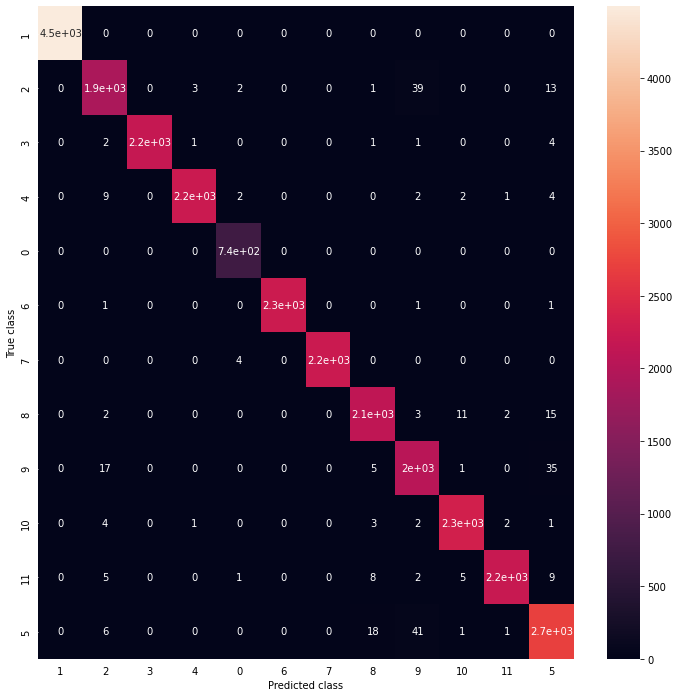

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# y_valid = valid['Steady']
# valid_drop = valid.drop(['Steady'],axis=1)
cm = confusion_matrix(Y_test, results)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df.shape)
plt.figure(figsize=(12,12))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='black')
plt.xlabel('Predicted class', color='black')
plt.tick_params(color='white',labelcolor='black')
plt.show()

In [ ]:
!echo "Attack2:" $time_taken  >> gpwr_execution_times.txt

#White-Box 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.3 MB/s 
     |████████████████████████████████| 160 kB 27.9 MB/s 
     |████████████████████████████████| 192.9 MB 74 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=20255e3952b571707e93d4cba02031002bba87de8ea9e9dd0ae2a81a013d4ba2
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import tpot

In [ ]:
import numpy as np
import pandas as pd
import sklearn
#import tpot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import csv
import platform
from tpot import TPOTClassifier
import time

#import h2o

In [ ]:
tpot_config = {
    'sklearn.ensemble.ExtraTreesClassifier':{
    'bootstrap': [False],
    'criterion' :["entropy"],
     'max_features' : [0.8], 'min_samples_leaf' : [12], 'min_samples_split':[20], 'n_estimators':[100]}
}

In [ ]:
#Entering the TPOTClassifier Parameters
#CV=10, random_state=0
tpot = TPOTClassifier(generations=10, population_size=10, cv=10, verbosity=2,  random_state=0, n_jobs=-1, config_dict=tpot_config)

In [ ]:
predictions.shape

(55533,)

In [ ]:
%%time
#Starting Timer 
t0 = time.time()
#Creating the Classification Model
optimized = tpot.fit(X_train, Y_train)
#Stopping Timer 
t1 = time.time()
#Printing Execution Time for fit 
total = t1-t0
print( "The total time taken to run is:" + str(total) + " seconds" )

Optimization Progress:   0%|          | 0/110 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9721599511840262

Generation 2 - Current best internal CV score: 0.9721960131545766

Generation 3 - Current best internal CV score: 0.9729165520812687

Generation 4 - Current best internal CV score: 0.9729165520812687

Generation 5 - Current best internal CV score: 0.9729165520812687

Generation 6 - Current best internal CV score: 0.973708773903379

Generation 7 - Current best internal CV score: 0.973708773903379


In [ ]:
%%time
#Starting Timer 
t0 = time.time()
#Creating the Classification Model
optimized = tpot.fit(X_train, Y_train)
#Stopping Timer 
t1 = time.time()
#Printing Execution Time for fit 
total = t1-t0
print( "The total time taken to run is:" + str(total) + " seconds" )

Optimization Progress:   0%|          | 0/110 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9710436905042347

Generation 2 - Current best internal CV score: 0.9723400534858694

Generation 3 - Current best internal CV score: 0.9723400534858694

Generation 4 - Current best internal CV score: 0.9727003359211472

Generation 5 - Current best internal CV score: 0.9727003359211472

Generation 6 - Current best internal CV score: 0.9735646168246994

Generation 7 - Current best internal CV score: 0.9735646168246994

Generation 8 - Current best internal CV score: 0.9744290404195018

Generation 9 - Current best internal CV score: 0.9744290404195018

Generation 10 - Current best internal CV score: 0.9744290404195018

Best pipeline: ExtraTreesClassifier(ExtraTreesClassifier(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=12, min_samples_split=20, n_estimators=100), bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=12, min_samples_sp

In [ ]:
# Export the pipeline as a python script file
tpot.export('tpot_white_box2.py')